In [1]:
import pickle
import copy
with open('./active-peers.summary.pkl', 'rb') as f:
    openpeers = pickle.load(f)

In [ ]:
seenASOs = set()
mostCommonASOs = []
for timestep in openpeers:
    thisCounter = {'ts': timestep['ts']}
    common = dict(timestep

In [ ]:
['ip_counters']['aso'].most_common(10))
    seenASOs.update( set(common.keys()) )
    thisCounter.update(common)
    mostCommonASOs.append(thisCounter)

asoRankings = []
for timestep in openpeers:
    thisCounter = {'ts': timestep['ts']}
    common = timestep['ip_counters']['aso'].most_common()
    ranking = {pair[0]: rank+1 for rank, pair in enumerate(common)}
    thisCounter.update(ranking)
    asoRankings.append(thisCounter)
    
commonASORankings = []    
for i, timestep in enumerate(openpeers):
    tsRanking = []
    ts = timestep['ts']
    for aso in seenASOs:
        if aso in asoRankings[i]:
            point = (ts, aso, asoRankings[i][aso])
            commonASORankings.append(point)
        else:
            print("{0} not seen at {1}".format(aso, ts))
    

In [ ]:
seenCountries = set()
mostCommonCountries = []
for timestep in openpeers:
    thisCounter = {'ts': timestep['ts']}
    common = dict(timestep['ip_counters']['country'].most_common(8))
    seenCountries.update( set(common.keys()) )
    thisCounter.update(common)
    mostCommonCountries.append(thisCounter)

    
countryRankings = []
for timestep in openpeers:
    thisCounter = {'ts': timestep['ts']}
    common = timestep['ip_counters']['country'].most_common()
    ranking = {pair[0]: rank+1 for rank, pair in enumerate(common)}
    thisCounter.update(ranking)
    countryRankings.append(thisCounter)
    
commonCountryRankings = []    
for i, timestep in enumerate(openpeers):
    tsRanking = []
    ts = timestep['ts']
    for country in seenCountries:
        if country in countryRankings[i]:
            point = (ts, country, countryRankings[i][country])
            commonCountryRankings.append(point)
        else:
            print("{0} not seen at {1}".format(country, ts))
        

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline

In [5]:

dfCountry = pd.DataFrame.from_records(commonCountryRankings, columns=('ts', 'country', 'rank'))
dfCountry.index = pd.DatetimeIndex(dfCountry['ts'])


In [30]:
from collections import Counter 
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

def plotTopTS(n, start=0):
    s = slice(start,n)
    top = dict(Counter(i[1] for i in commonCountryRankings).most_common(n)[s]).keys()
    ncolors = abs(start-n) if start else n
    if not start:
        title = "Rank, top {0} peer countries of origin".format(n)
    else:
        title = "Rank {0}-{1} peer countries of origin".format(start, n)

    dfCountryTop = pd.DataFrame.from_records(
        [r for r in commonCountryRankings if r[1] in top and int(r[0].strftime("%M")[1]) in (0,)], 
        columns=('ts', 'country', 'rank')
    )
    
    sns.set(rc={'figure.figsize':(50,20)})
    fig, ax = plt.subplots()
    sns.lineplot(data=dfCountryTop, 
                 x='ts',y='rank', 
                 hue='country', palette=sns.color_palette("Set1", ncolors),
                 estimator=None, markers=True)

    ax.set(ylim=(0,20))
    loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %R'))
    plt.title(title, size="14")
    return fig


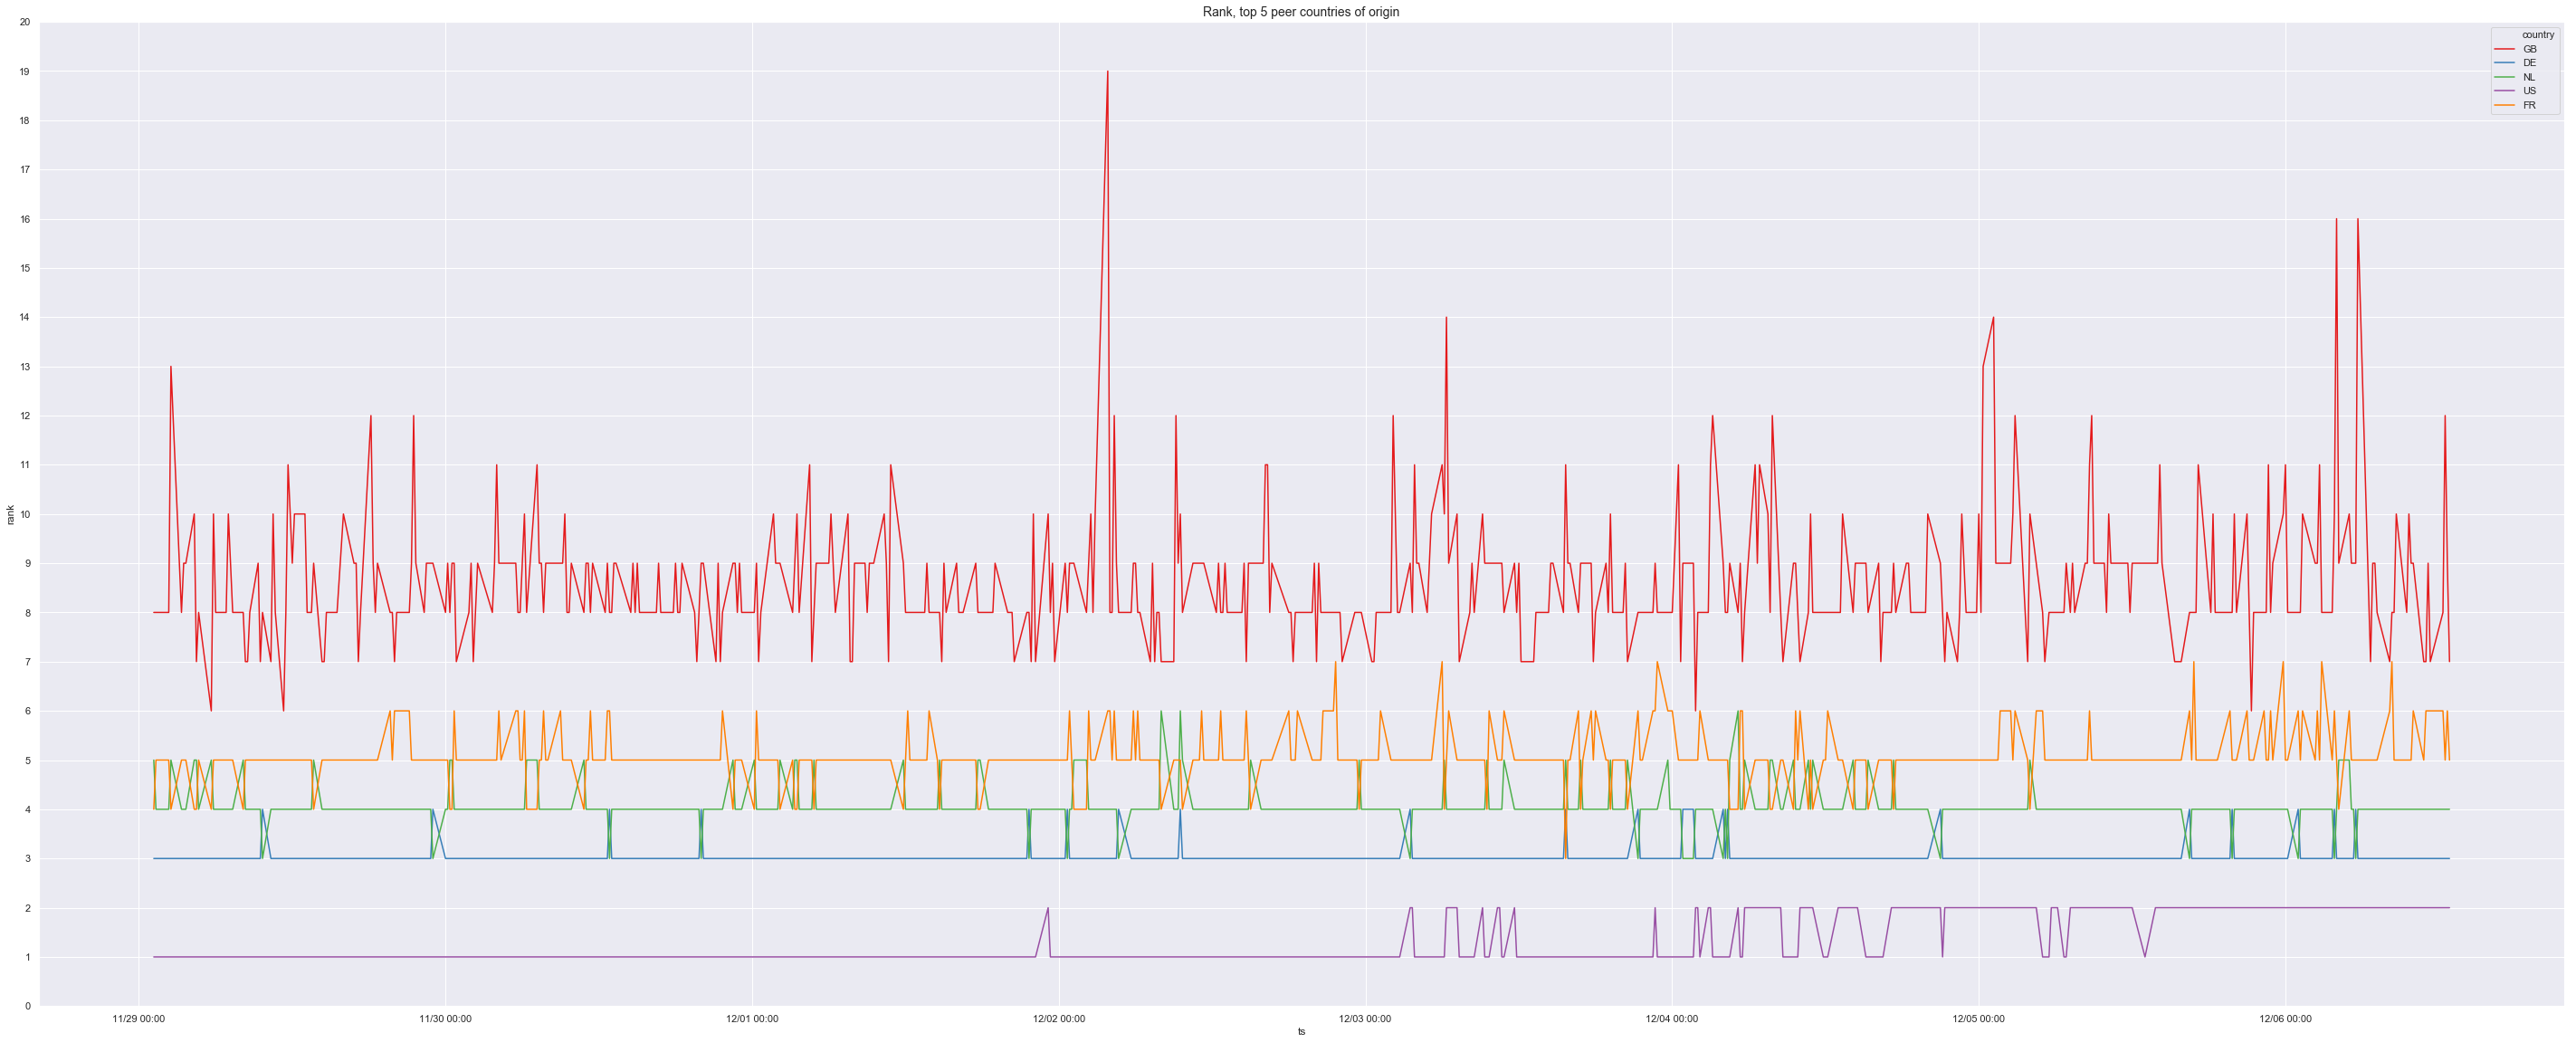

In [34]:
plotTopTS(5).savefig("rank-top5.png")
plotTopTS(10, 5).savefig("rank-5_10.png")
plotTopTS(15, 10).savefig("rank-10_15.png")